<a href="https://colab.research.google.com/github/pa7003/pa7003/blob/main/SA2025_W1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SUMMER ANALYTICS 2024



# Week-1 Assignment

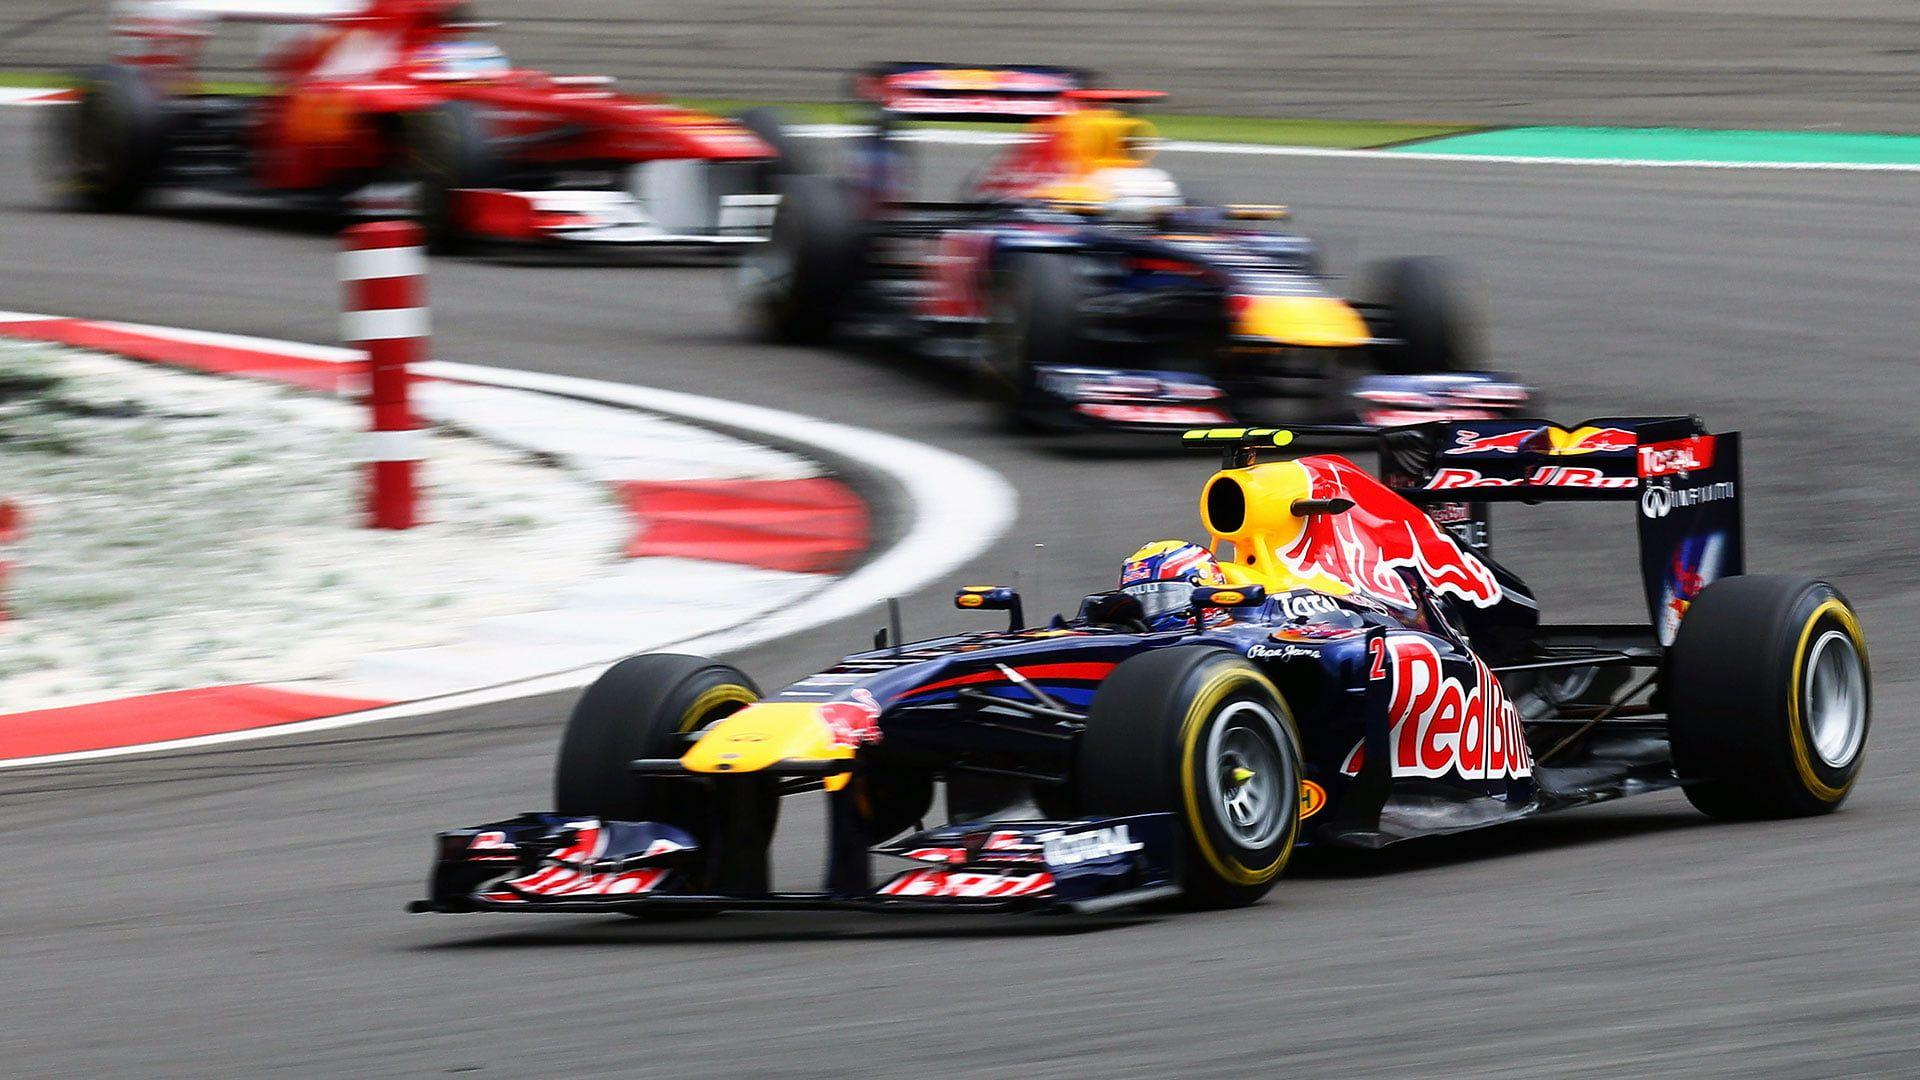

# **Data Grand Prix!**



**Welcome to your first assignment of Summer Analytics 2025! We hope you are excited to implement and test everything you have learnt up until now. The dataset which you'll use includes information about cars.**

**We've got an interesting set of questions for you to get a basic understanding of pandas and data visualization libraries. GOOD LUCK!**


***Let's get started with importing numpy, pandas, seaborn and matplotlib!***

Note - matplotlib should be imported with the command :

 `import matplotlib.pyplot as plt`

image.avif

**So lets get started!! Buckle up your belts for this exciting ride!!**

### 1) Start by importing all important libraries
For eg, "import numpy as np"

In [3]:
import numpy as np
import pandas as pd


### 2) Read the csv file and assign it to a variable .

In [18]:
df=pd.read_csv("/content/Cars.csv")


### 3) Display shape of dataframe
Expected Output - (398, 9)

In [8]:
df.shape


(398, 9)

### 4) Print all columns of dataframe
Return an array containing names of all the columns.

In [11]:
df.columns.values

array(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'], dtype=object)

### 6) Set the 'name' column as the index of dataframe

In [12]:
df.set_index('name', inplace=True)


###  7) Print a list of all the unique mpg values





In [13]:
print(df['mpg'].unique())


[18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]


### 8) Create a column which contains the horsepower divided by weightas its metric and make this new column the index.

In [14]:
df['horsepower_per_weight'] = df['horsepower']/df['weight']
df.set_index('horsepower_per_weight', inplace=True)


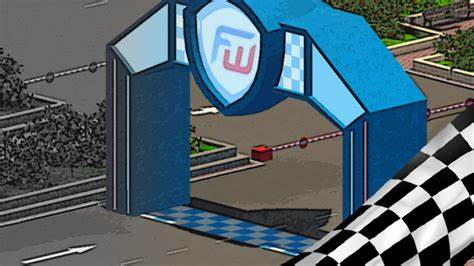

 **Checkpoint!!
Congratulations on making it this far. You are really keeping up in Data Grand Prix.
Now starts the real race i.e. graded questions of the quiz.**

## GRADED Questions (To be answered in the quiz)
### Try to retrieve some information from the data and answer the questions below . BEST OF LUCK !!

### 1. What is name of car that has the highest horsepower?  

In [16]:
highest_hp_car = df.loc[df['horsepower'].idxmax()]
print(highest_hp_car)

mpg              16.0
cylinders           8
displacement    400.0
horsepower      230.0
weight           4278
acceleration      9.5
model_year         73
origin            usa
Name: 0.053763440860215055, dtype: object


### 2. How many cars have mpg ≥ 35?

In [22]:
mpg_35_cars = df[df['mpg'] >= 35].shape[0]
print(mpg_35_cars)


36


### 3. What is the most common origin for cars with horsepower > 100 and weight < 3000?

In [23]:
filtered_cars = df[(df['horsepower']>100) & (df['weight']<3000)]
common_origin = filtered_cars['origin'].mode()[0]
print(common_origin)

usa


### 4. What is the mean acceleration of cars from Japan? (rounded to 2 decimals)

In [24]:
japan_cars = df[df['origin'] == 'japan']
mean_acc_japan = round(japan_cars['acceleration'].mean(),2)
print(mean_acc_japan)

16.17


### 5. Which year had the highest average mpg?

In [25]:
avg_mpg_by_year = df.groupby('model_year')['mpg'].mean()
year_highest_avg_mpg = avg_mpg_by_year.idxmax()
print(year_highest_avg_mpg)

80



## *Congratulations on coming this far! Since we were having so much fun playing with this dataset, let's move towards finish line by attempting some Ungraded questions!*

### **Note:** These questions are UNGRADED, and are given as an extra exercise.

### Find the car (or cars) with the best ratio of horsepower to weight among all cars that also have above-median mpg.

In [27]:
median_mpg = df['mpg'].median()
above_median = df[df['mpg']>median_mpg].copy()
above_median['hp_to_weight_ratio'] = above_median['horsepower']/above_median['weight']
best_ratio_cars = above_median[above_median['hp_to_weight_ratio'] == above_median['hp_to_weight_ratio'].max()]
print(best_ratio_cars)

     mpg  cylinders  displacement  horsepower  weight  acceleration  \
23  26.0          4         121.0       113.0    2234          12.5   

    model_year  origin      name  hp_to_weight_ratio  
23          70  europe  bmw 2002            0.050582  


### Design a multi-line plot using Matplotlib or Seaborn that shows the evolution of average mpg over the years, separately for each origin

<function matplotlib.pyplot.show(close=None, block=None)>

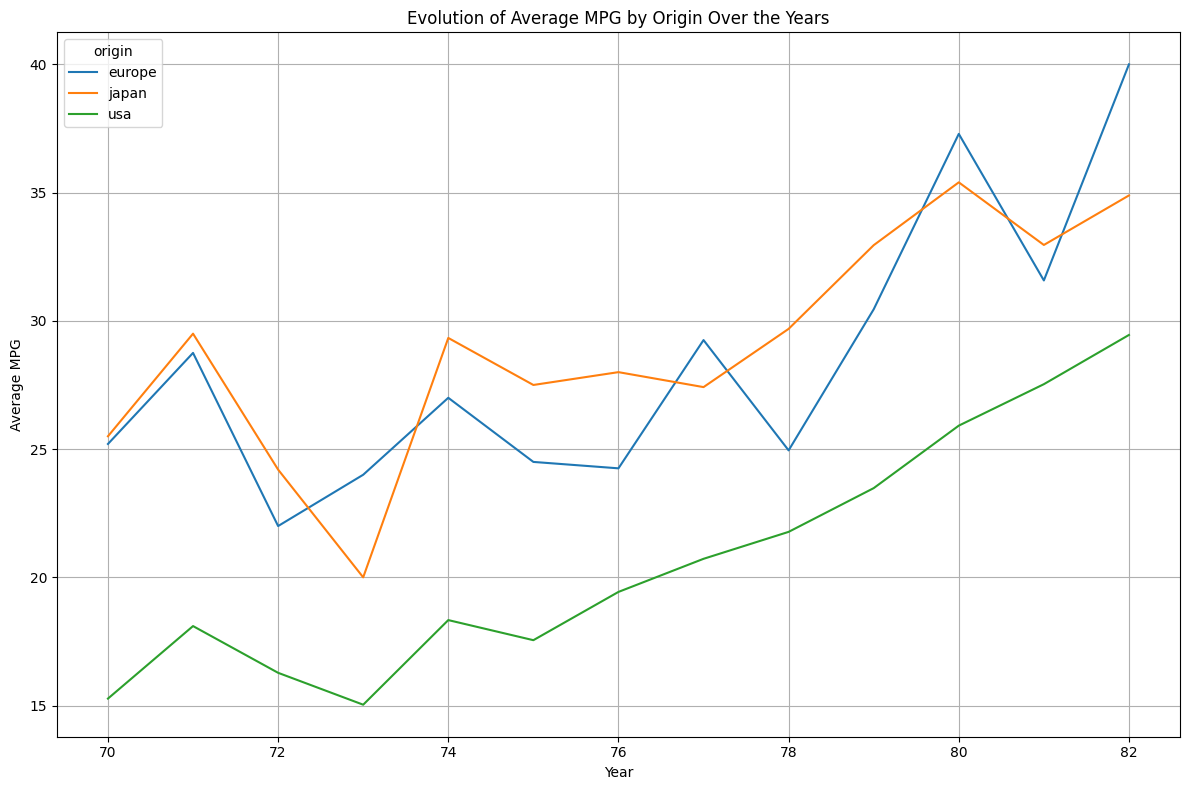

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

avg_mpg_by_origin_year =  df.groupby(['model_year', 'origin'])['mpg'].mean().reset_index()
plt.figure(figsize=(12,8))
sns.lineplot(data=avg_mpg_by_origin_year, x='model_year', y='mpg', hue='origin')
plt.title('Evolution of Average MPG by Origin Over the Years')
plt.xlabel('Year')
plt.ylabel('Average MPG')
plt.grid(True)
plt.tight_layout()
plt.show

### Create a Seaborn scatterplot (or PairGrid) where:

X = horsepower

Y = weight

Color by: origin

Size by: mpg

Hue order = ['japan', 'europe', 'usa']

Add meaningful plot titles and axis titles.

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')


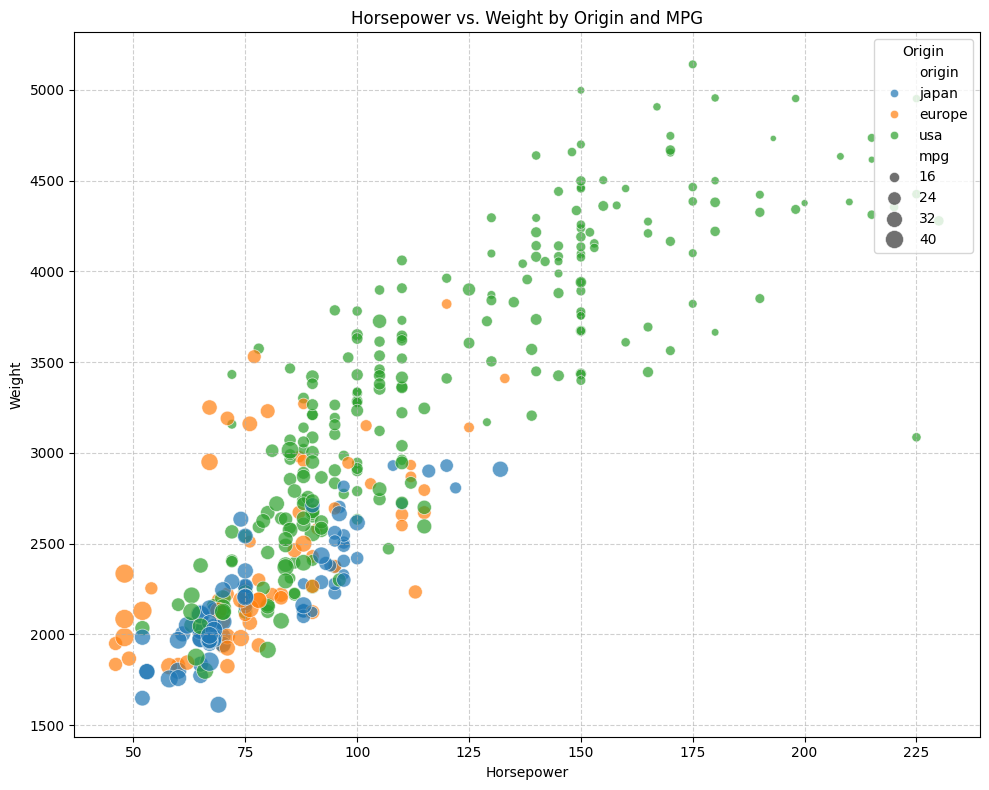

In [33]:
print(df.columns)

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='horsepower', y='weight', hue='origin', size='mpg',
                sizes=(20, 200), alpha=0.7, hue_order=['japan', 'europe', 'usa'])
plt.title('Horsepower vs. Weight by Origin and MPG')
plt.xlabel('Horsepower')
plt.ylabel('Weight')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Origin', loc='upper right') # Add a legend for 'origin'
plt.tight_layout()
plt.show()


### We define a “consistent” car model as one that was produced over multiple years and had very low variation in mpg across those years (standard deviation < 1.0).

Tasks:

Identify car names that appear in more than one model_year.

For each such name, compute the standard deviation of mpg across years.

Return the car(s) with the lowest variation in mpg, among those with at least 2 appearances and std(mpg) < 1.0.

Report the model name(s), number of appearances, and the average mpg.

Bonus:
Sort the result by number of appearances (descending), then mpg (descending).

In [34]:
car_year_counts = df.groupby('name')['model_year'].nunique()
consistent_car_names = car_year_counts[car_year_counts > 1].index

mpg_std_by_car = df[df['name'].isin(consistent_car_names)].groupby('name')['mpg'].std()

low_variation_cars = mpg_std_by_car[mpg_std_by_car < 1.0]

final_consistent_car_names = low_variation_cars.index

final_cars_df = df[df['name'].isin(final_consistent_car_names)]

car_summary = final_cars_df.groupby('name').agg(
    appearances=('model_year', 'nunique'),
    average_mpg=('mpg', 'mean')
)

car_summary = car_summary[car_summary['appearances'] >= 2]

if not low_variation_cars.empty:
    min_std = low_variation_cars.min()
    lowest_variation_car_names = low_variation_cars[low_variation_cars == min_std].index

    best_consistent_cars = car_summary[car_summary.index.isin(lowest_variation_car_names)]

    best_consistent_cars_sorted = best_consistent_cars.sort_values(by=['appearances', 'average_mpg'], ascending=[False, False])

    print("Car(s) with the lowest variation in MPG (std < 1.0 and >= 2 appearances):")
    print(best_consistent_cars_sorted)
else:
    print("No consistent car models found with MPG standard deviation less than 1.0 and at least 2 appearances.")


Car(s) with the lowest variation in MPG (std < 1.0 and >= 2 appearances):
              appearances  average_mpg
name                                  
datsun pl510            2         27.0


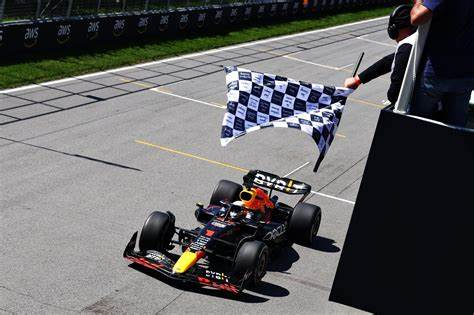

**Congratulations on completing the race. Kudos to you. Looking forward to meet you in next week.**